In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [2]:
# Step 1: Load and preprocess the dataset
df = pd.read_csv("/content/Housing.csv")


In [3]:
# One-hot encode categorical variables (drop_first=True to avoid dummy variable trap)
df_encoded = pd.get_dummies(df, drop_first=True)

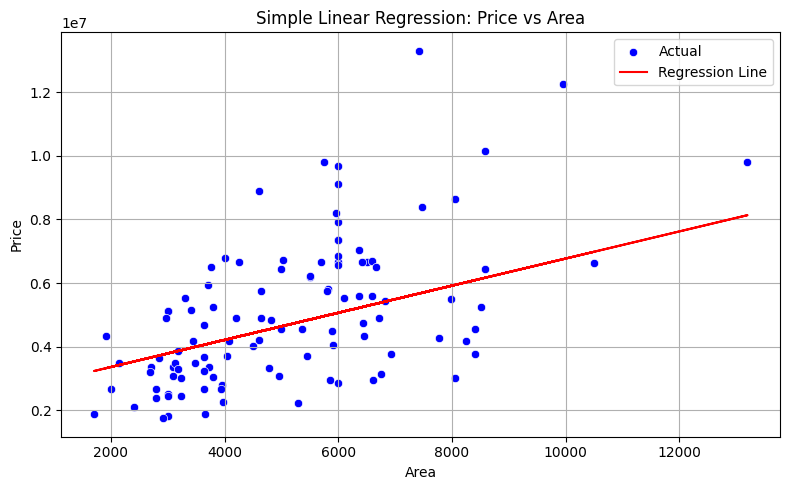

Simple Linear Regression Results
MAE: ₹1,474,748
MSE: ₹3,675,286,604,768
R² Score: 0.27
Coefficient (slope): 425.73
Intercept: ₹2,512,254.26


In [4]:
# Simple Linear Regression: price ~ area
# ============================
X_simple = df_encoded[['area']]
y = df_encoded['price']

# Step 2: Train-test split
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_simple, y, test_size=0.2, random_state=42)

# Step 3: Train the model
lr_simple = LinearRegression()
lr_simple.fit(X_train_s, y_train_s)

# Step 4: Predict and evaluate
y_pred_s = lr_simple.predict(X_test_s)
mae_s = mean_absolute_error(y_test_s, y_pred_s)
mse_s = mean_squared_error(y_test_s, y_pred_s)
r2_s = r2_score(y_test_s, y_pred_s)

# Step 5: Plot the regression line
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_test_s['area'], y=y_test_s, label='Actual', color='blue')
plt.plot(X_test_s['area'], y_pred_s, color='red', label='Regression Line')
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Simple Linear Regression: Price vs Area')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Print results for Simple Linear Regression
print("Simple Linear Regression Results")
print(f"MAE: ₹{mae_s:,.0f}")
print(f"MSE: ₹{mse_s:,.0f}")
print(f"R² Score: {r2_s:.2f}")
print(f"Coefficient (slope): {lr_simple.coef_[0]:,.2f}")
print(f"Intercept: ₹{lr_simple.intercept_:,.2f}")


In [5]:
# Multiple Linear Regression: price ~ all features
# ============================
X_multi = df_encoded.drop('price', axis=1)

# Step 2: Train-test split
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_multi, y, test_size=0.2, random_state=42)

# Step 3: Train the model
lr_multi = LinearRegression()
lr_multi.fit(X_train_m, y_train_m)

# Step 4: Predict and evaluate
y_pred_m = lr_multi.predict(X_test_m)
mae_m = mean_absolute_error(y_test_m, y_pred_m)
mse_m = mean_squared_error(y_test_m, y_pred_m)
r2_m = r2_score(y_test_m, y_pred_m)

# Step 5: Coefficient analysis
coeff_df = pd.DataFrame({
    'Feature': X_multi.columns,
    'Coefficient': lr_multi.coef_
}).sort_values(by='Coefficient', key=abs, ascending=False)

# Print results for Multiple Linear Regression
print("\nMultiple Linear Regression Results")
print(f"MAE: ₹{mae_m:,.0f}")
print(f"MSE: ₹{mse_m:,.0f}")
print(f"R² Score: {r2_m:.2f}")
print("\nTop Influential Features:")
print(coeff_df.head(10))


Multiple Linear Regression Results
MAE: ₹970,043
MSE: ₹1,754,318,687,331
R² Score: 0.65

Top Influential Features:
                         Feature   Coefficient
2                      bathrooms  1.094445e+06
9            airconditioning_yes  7.914267e+05
8            hotwaterheating_yes  6.846499e+05
10                  prefarea_yes  6.298906e+05
12  furnishingstatus_unfurnished -4.136451e+05
3                        stories  4.074766e+05
7                   basement_yes  3.902512e+05
5                   mainroad_yes  3.679199e+05
6                  guestroom_yes  2.316100e+05
4                        parking  2.248419e+05
